# Sieci konwolucyjne

Zadanie dla Państwa na te ćwiczenia to implementacja funkcji konwolucji oraz max pooling dla obrazów.

In [1]:
# ploting
%matplotlib inline
# imports
import torch
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

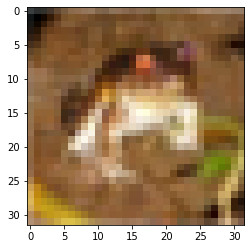

In [2]:
# data loading
cifar_sample = np.load('resources/cifar_sample.npy')
# get a first random image
np_image = cifar_sample[0]
# this should plot a blurry frog
plt.imshow(np_image.transpose(1,2,0)) 

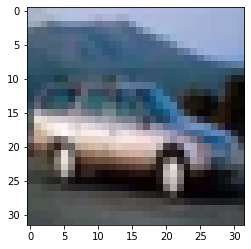

In [14]:
np_image = cifar_sample[4]
plt.imshow(np_image.transpose(1,2,0))

### Wzory na rozmiary
**Pytanie 1**: Jaki będzie rozmiar obrazka na wyjściu konwolucji/poolingu przy parametrach poniżej.  
**Uwaga**: zarówno we wzorach jak i w kodzie używana jest torchowa konwencja *channel first*.

Stride: $ \hspace{95px} S $  
Padding: $ \hspace{80px} P $  
Obrazek wejściowy: $ \hspace{12px} C_i \times H_i \times W_i$  
Filtry: $ \hspace{100px} K \times C_f \times F \times F $  

Gdzie: $C_i$ to liczba kanału obrazu wejściowego, $H_i, W_i$ to odpowiednio wysokość i szerokość obrazu wejściowego. $K$ to liczba filtrów, $C_f$ liczba kanałów w każdym filtrze, $F$ to zarówno wysokość jak i szerokość filtra (rozważamy tylko filtry kwadratowe).

Obrazek wyjściowy: $ \hspace{15px} C_o \times H_o \times W_o $  


$ \hspace{140px} C_o = \text{???} $  

$ \hspace{140px} H_o = \text{???} $  

$ \hspace{140px} W_o = \text{???} $  

**Pytanie 2**: Ile wag (floatów) ma taka warstwa konwolucyja?   


### Wizualna pomoc do konwolucji
[Źródło](http://cs231n.github.io/convolutional-networks/)

<img src="./resources/cnn.gif"></img>

### Zadanie 1:  Konwolucja (5 pkt.)
Zadaniem jest zaimplementowanie funkcji konwolucji i poolingu dla obrazka 2D. Implementacja nie musi być optymalna pod względem złożoności czasowej (tzn. można/zaleca się używać pętli). 

Warunkiem zaliczenia zadania jest przejście komórek testowych dla konwolucji i poolingu. W razie problemów polecam zacząć od poolingu, który jest podobny do konwolucji, ale mniej skomplikowany.

In [16]:
def convolution(image: torch.tensor, 
                filters: torch.tensor, 
                bias: torch.tensor, 
                stride: int = 1, 
                padding: int = 1):
    """
    :param image: torch.Tensor 
        Input image of shape (C, H, W)
    :param filters: torch.Tensor 
        Filters to use in convolution of shape (K, C, F, F)
    :param bias: torch.Tensor 
        Bias vector of shape (K,)
    :param stride: int
        Stride to use in convolution
    :param padding: int
       Zero-padding to add on all sides of the image 
    """
    # get image dimensions
    img_channels, img_height, img_width = image.shape 
    n_filters, filter_channels, filter_size, filter_size = filters.shape 
    # calculate the dimensions of the output image
    out_height = int(((img_height - filter_size + 2 * padding) / stride) + 1)
    out_width = int(((img_width - filter_size + 2 * padding) / stride) + 1)
    out_channels = n_filters
    
    # your code here
    if padding > 0:
        padded_hight = img_height + 2 + padding
        padded_width = img_width + 2 * padding

        padded_img = torch.zeros((img_channels, padded_hight, padded_width))
        padded_img[:, padding:-padding, padding:-padding] = image
    else:
        padded_hight = img_height
        padded_width = img_width
        padded_img = image

    out = torch.zeros((out_channels, out_height, out_width))

    for n in range(n_filters):
        for i in range(0, padded_hight - filter_size + 1, stride):
            for j in range(0, padded_width - filter_size +1, stride):

                img_crop = padded_img[:, i:i+filter_size, j:j+filter_size]



    return out

In [24]:
# Convolution Test

# cast the frog to tensor
image = torch.tensor(np_image)
# preapre parameters for testing
paddings = [0, 1, 2, 3]
strides = [1, 2, 3, 4]
filters = [(torch.randn((2,3,3,3)), torch.randn((2))),
           (torch.randn((2,3,5,5)), torch.randn((2))),
           (torch.randn((5,3,1,1)), torch.randn((5)))]

# test all combinations
for (filt, bias), stride, padding in product(filters, strides, paddings):
    # your convolution
    out = convolution(image, filt, bias, stride=stride, padding=padding)
    # PyTorch equivalent
    out_torch = torch.conv2d(input=image.unsqueeze(0), weight=filt, bias=bias, padding=padding, stride=stride)
    # asserts
    assert out_torch.squeeze().shape == out.shape
    assert torch.allclose(out, out_torch.squeeze(), atol=1, rtol=1)

RuntimeError: The expanded size of the tensor (33) must match the existing size (32) at non-singleton dimension 1.  Target sizes: [3, 33, 32].  Tensor sizes: [3, 32, 32]

### Zadanie 2. Max Pooling (2 pkt.)
Operacja *max pooling* jest analogiczna do zwykłej konwolucji, lecz zamiast operacji mnożenia z zadanym filtrem na każdym fragmencie wejścia wykonywana jest funkcja *max*.

In [5]:
def max_pooling(image: torch.tensor, 
                kernel_size: int, 
                stride: int = 1, 
                padding: int = 1):
    """
    :param image: torch.Tensor 
        Input image of shape (C, H, W)
    :param kernel_size: int 
        Size of the square pooling kernel
    :param stride: int
        Stride to use in pooling
    :param padding: int
       Zero-padding to add on all sides of the image 
    """
    # get image dimensions
    img_channels, img_height, img_width = image.shape
    # calculate the dimensions of the output image
    out_height = int(((img_height - kernel_size + 2 * padding) / stride) + 1)
    out_width = int(((img_width - kernel_size + 2 * padding) / stride) + 1)
    out_channels = img_channels

    if padding > 0:
        padded_height = img_height + 2 * padding
        padded_width = img_width + 2 * padding

        padded_img = torch.zeros((img_channels, padded_height, padded_width))
        padded_img[:, padding:-padding, padding:-padding] = image
    else:
        padded_height = img_height
        padded_width = img_width
        padded_img = image

    out = torch.zeros((out_channels, out_height, out_width))

    for i in range(0, padded_height - kernel_size + 1, stride):

        for j in range(0, padded_width - kernel_size + 1, stride):

            img_crop = padded_img[:, i:i+kernel_size, j:j+kernel_size]
                        
            out[:, i // stride, j // stride] = torch.max(torch.max(img_crop, dim=2)[0], dim=1)[0]

    return out

In [6]:
# Max Pooling Test
from itertools import product

# cast the frog to tensor
image = torch.tensor(np_image)
# preapre parameters for testing
kernel_sizes = [2, 3, 4]
paddings = [0, 1]
strides = [1, 2, 3, 4]

# test all combinations
for kernel_size, stride, padding in product(kernel_sizes, strides, paddings):
    # your pooling
    out = max_pooling(image, kernel_size=kernel_size, stride=stride, padding=padding)
    # PyTorch equivalent
    out_torch = torch.nn.functional.max_pool2d(input=image.unsqueeze(0), kernel_size=kernel_size, padding=padding, stride=stride)
    # asserts
    assert out_torch.squeeze().shape == out.shape
    assert torch.allclose(out, out_torch.squeeze(), atol=1e-5, rtol=1e-5)